## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, o objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio

O objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem

Desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Temos aqui 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa avaliaremos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e alguns exemplos de univariada.

In [4]:
print(df['mau'].value_counts())

# Calcula a média da coluna 'mau' (representando a taxa de inadimplência)
print(f"\nTaxa de inadimplência:\n{df['mau'].mean()}")

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplência:
0.023423423423423424


Text(0, 0.5, 'Clientes')

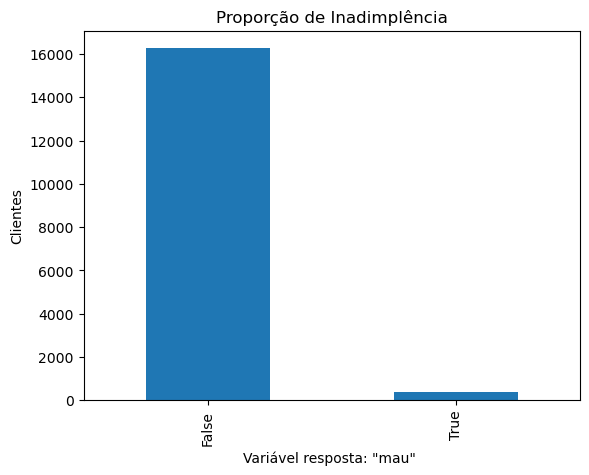

In [8]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

grafico_barras.set_title('Proporção de Inadimplência')
grafico_barras.set_xlabel('Variável resposta: "mau" ')
grafico_barras.set_ylabel('Clientes')

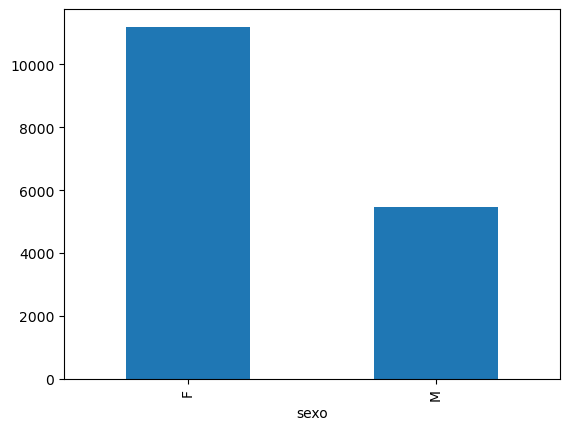

In [6]:
var = 'sexo'
grafico_barras = df[var].value_counts().plot.bar()

Text(0.5, 0, 'Posse de Veículo')

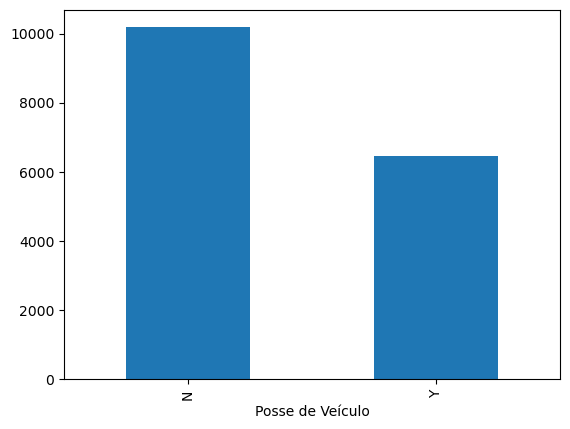

In [10]:
var = 'posse_de_veiculo'
grafico_barras = df[var].value_counts().plot.bar()
grafico_barras.set_xlabel('Posse de Veículo')

Text(0.5, 0, 'Posse de Imóvel')

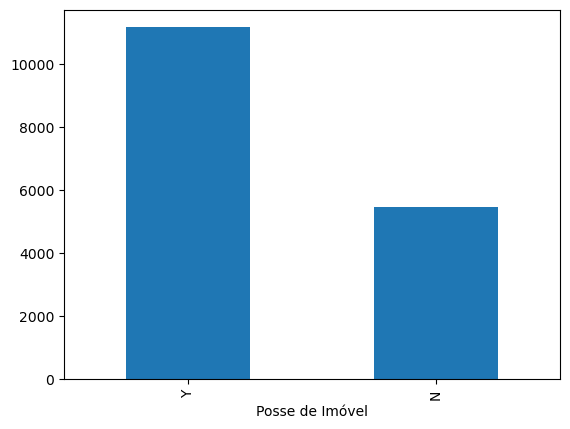

In [11]:
var = 'posse_de_imovel'
grafico_barras = df[var].value_counts().plot.bar()
grafico_barras.set_xlabel('Posse de Imóvel')

<Figure size 640x480 with 0 Axes>

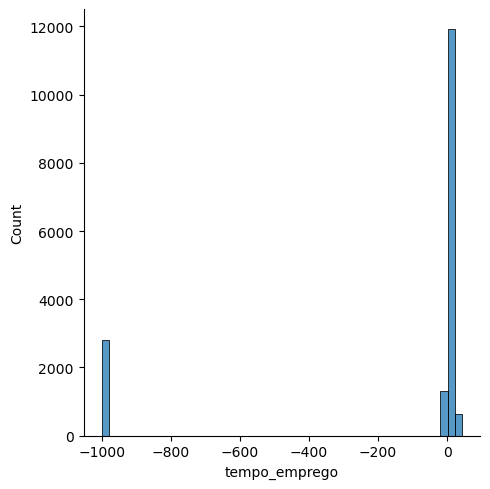

In [13]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

In [14]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 640x480 with 0 Axes>

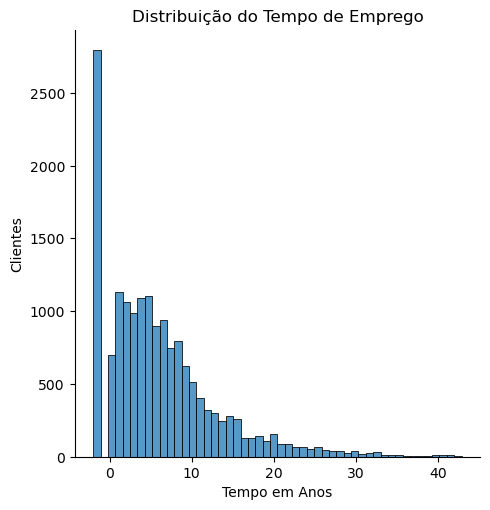

In [15]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)

plt.title('Distribuição do Tempo de Emprego')
plt.xlabel('Tempo em Anos')
plt.ylabel('Clientes')

plt.show()

<Figure size 640x480 with 0 Axes>

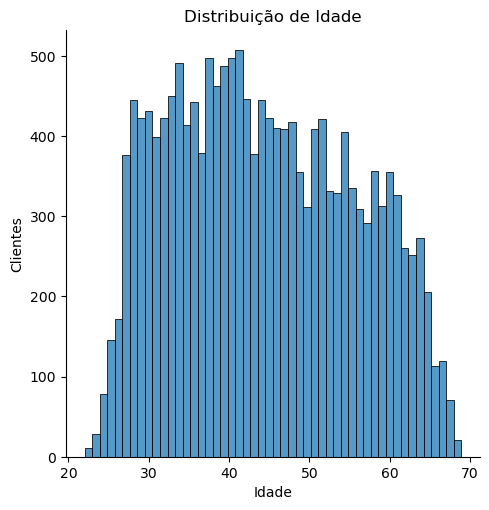

In [16]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Clientes')

plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


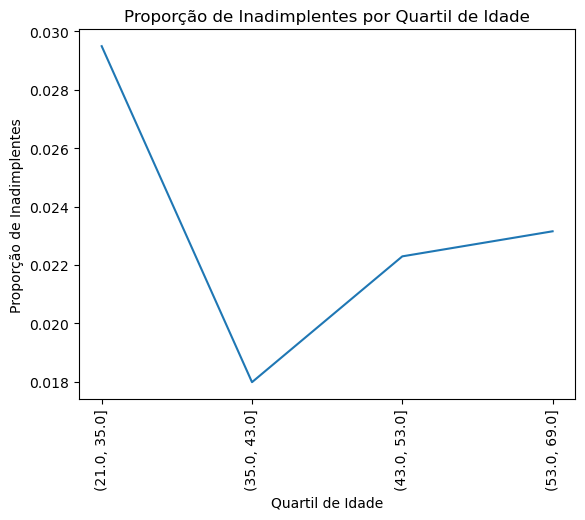

In [20]:
var = 'idade'
df[var] = df[var].round()

cat_srs, bins = pd.qcut(df[var], 4, retbins=True, precision=0)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()

ax.set_title('Proporção de Inadimplentes por Quartil de Idade')
ax.set_xlabel('Quartil de Idade')
ax.set_ylabel("Proporção de Inadimplentes")

ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Clientes com até 34 anos tendem a ter uma maior taxa de inadimplência

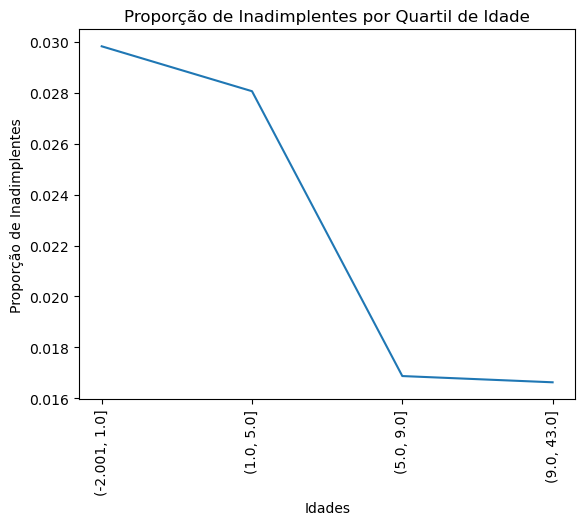

In [22]:
var = 'tempo_emprego'
df[var] = df[var].round()

cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_title('Proporção de Inadimplentes por Quartil de Idade')
ax.set_xlabel('Idades')
ax.set_ylabel("Proporção de Inadimplentes")

ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

- Clientes com até 4 anos no emprego apresentam uma maior proporção de inadimplência

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizaremos as seguintes operações com os dados:

- seleção

Neste caso, os dados já estão pré-selecionados
- limpeza

Precisaremos identificar e tratar dados faltantes
- construção

Neste primeiro momento não faremos construção de novas variáveis
- integração

Temos apenas uma fonte de dados, não é necessário agregação
- formatação

Os dados já se encontram em formatos úteis, pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula.

In [23]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,48
tempo_emprego,float64,44


In [24]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [25]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [27]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,59.0,3.0,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.0,8.0,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.0,8.0,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.0,2.0,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.0,3.0,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa realizaremos a construção do modelo com os seguintes passos:

- Selecionar a técnica de modelagem

Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas.
- Desenho do teste

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, vamos dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado.
- Avaliação do modelo

Faremos a avaliação do modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia.
#### Dividindo a base em treino e teste



In [30]:
# Tirando a variável resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [31]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
14584,0,30.0,4.0,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
15960,0,39.0,3.0,1,0,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
9606,1,35.0,3.0,1,0,1,0,3.0,True,True,...,False,False,False,False,False,False,False,False,False,False
4597,0,42.0,19.0,1,0,1,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
722,2,41.0,9.0,1,1,0,1,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,3,38.0,11.0,1,0,0,0,5.0,False,True,...,False,False,False,False,False,False,False,False,False,False
15645,0,44.0,6.0,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4470,0,34.0,3.0,1,1,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4560,1,42.0,6.0,1,1,1,0,3.0,True,True,...,False,False,False,False,False,False,False,False,False,False


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado.

In [32]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [33]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.45%


In [34]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1, 0] / (tab.iloc[1, 0] + tab.iloc[0, 0]))
print(tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[0, 1]))

tab = pd.crosstab(index = y_pred, columns = y_test)

0.0032043381809218636
0.12264150943396226


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste caso, ela termina com a acurácia.
Como um exemplo simples, consideramos que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

De acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovar   | 4042 x 5          | 72 x (-100)    | 13.010 |
| Reprovar  |  27 x 5           | 22 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.